# **Step 1: Problem statement**

We want to build the regression model to predict the House price (Target value ) using the given dataset.

# **Step 2: Data Collection**

In [2]:
import pandas as pd
df=pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Unnamed: 13,Unnamed: 14
0,8645000,4560.0,3,2,2,yes,yes,yes,no,yes,1,no,fully furnished,NaN,545.0
1,8043000,7482.0,3,2,3,yes,no,no,yes,no,1,yes,fully furnished,NaN,NaN
2,7000000,11175.0,3,1,1,yes,no,yes,no,yes,1,yes,fully furnished,NaN,NaN
3,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished,NaN,NaN
4,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1890000,3649.0,2,1,1,yes,no,no,no,no,0,no,unfurnished,NaN,NaN
541,1855000,2990.0,2,1,1,no,no,no,no,no,1,no,unfurnished,NaN,NaN
542,1820000,3000.0,2,1,1,yes,no,yes,no,no,2,no,unfurnished,NaN,NaN
543,1750000,3620.0,2,1,1,yes,no,no,no,no,0,no,unfurnished,NaN,NaN


# **Step 3: Data Cleaning**

In [5]:
print(df.info())
print(df.isnull().sum())
df = df.drop_duplicates()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              541 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
 13  Unnamed: 13       0 non-null      float64
 14  Unnamed: 14       1 non-null      float64
dtypes: float64(3), int64(5), object(7)
memory usage: 64.0+ KB
None
price                 0
area

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Unnamed: 13,Unnamed: 14
0,8645000,4560.0,3,2,2,yes,yes,yes,no,yes,1,no,fully furnished,NaN,545.0
1,8043000,7482.0,3,2,3,yes,no,no,yes,no,1,yes,fully furnished,NaN,NaN
2,7000000,11175.0,3,1,1,yes,no,yes,no,yes,1,yes,fully furnished,NaN,NaN
3,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished,NaN,NaN
4,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished,NaN,NaN


**Import Libraries**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import r2_score

# **Step 4: Exploratory Data Analysis**

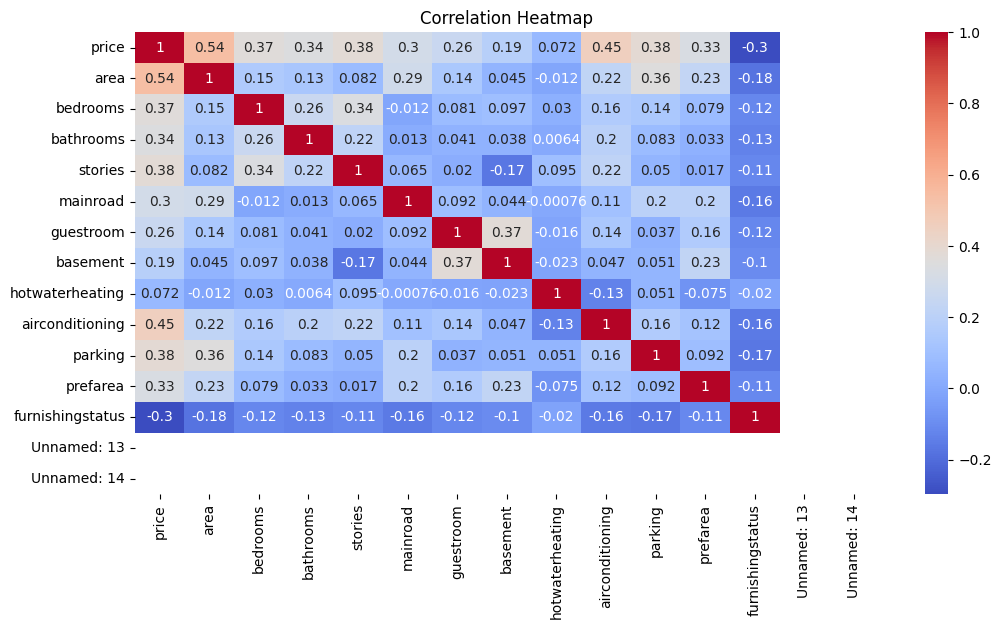

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


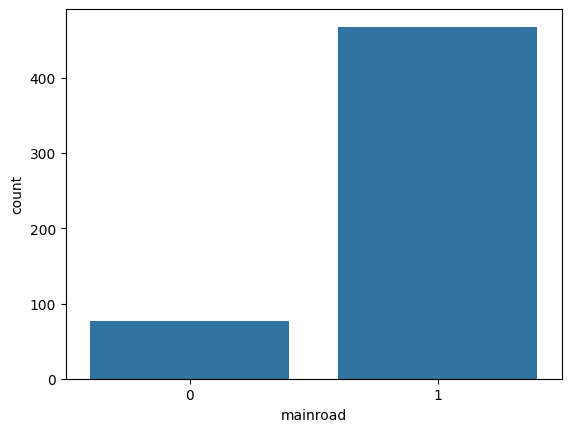

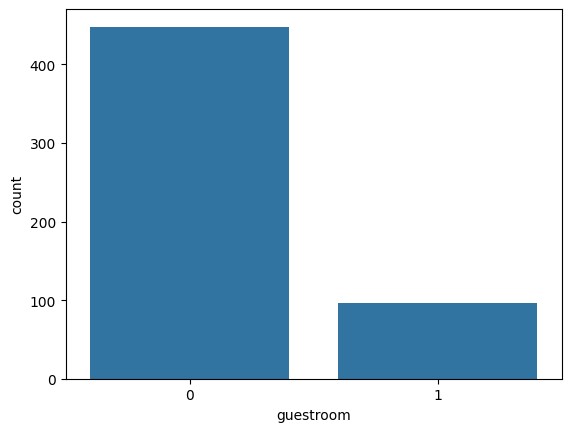

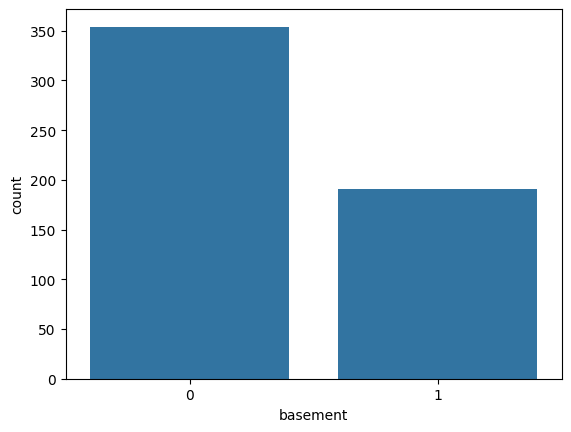

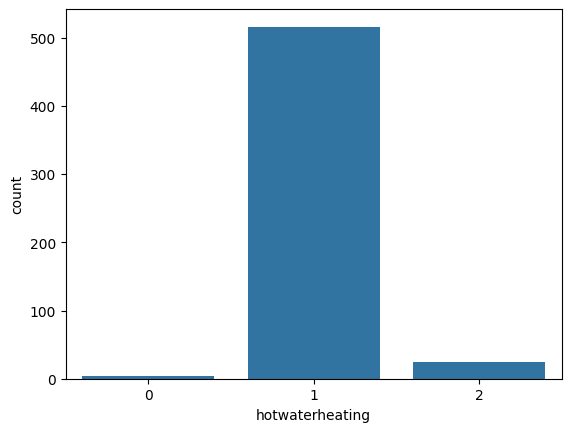

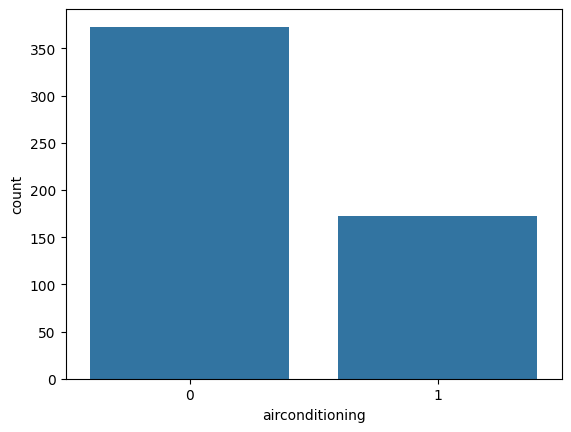

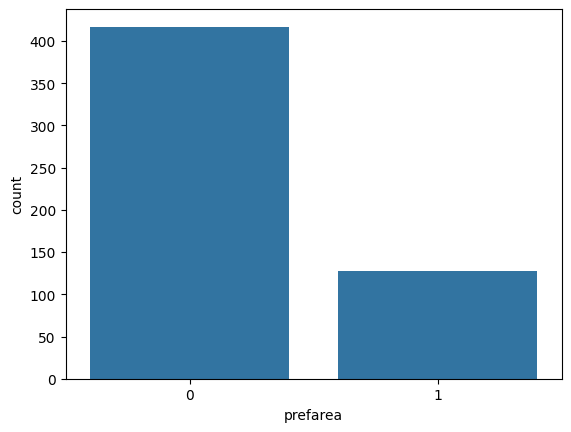

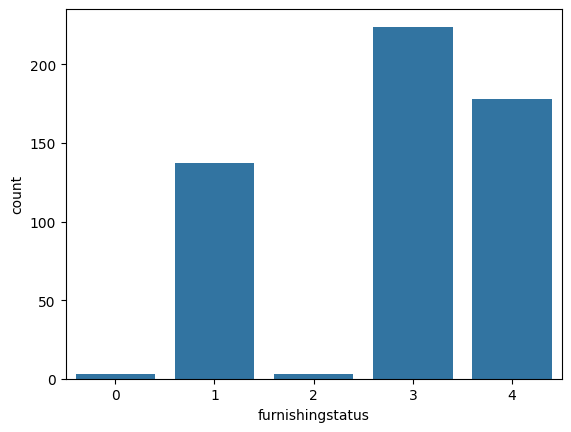

In [43]:
categorical_cols = ["mainroad","guestroom","basement",
                    "hotwaterheating","airconditioning",
                    "prefarea","furnishingstatus"]

for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.show()


# **Step 5: Feature Engineering**

In [44]:
categorical_cols = ["mainroad","guestroom","basement",
                    "hotwaterheating","airconditioning",
                    "prefarea","furnishingstatus"]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
X = df.drop("price", axis=1)
y = df["price"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"\nX shape: {X.shape}, y shape: {y.shape}")
print("After Encoding:\n", df.head())


X shape: (545, 14), y shape: (545,)
After Encoding:
       price     area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0   8645000   4560.0         3          2        2         1          1   
1   8043000   7482.0         3          2        3         1          0   
2   7000000  11175.0         3          1        1         1          0   
3  13300000   7420.0         4          2        3         1          0   
4  12250000   8960.0         4          4        4         1          0   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         1                1                1        1         0   
1         0                2                0        1         1   
2         1                1                1        1         1   
3         0                1                1        2         1   
4         0                1                1        3         0   

   furnishingstatus  Unnamed: 13  Unnamed: 14  
0                 0          NaN      

# **Step 6: Model Building**

In [45]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

# **Step 7: Model Evaluation & validation**

In [46]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} → R²: {r2:.4f}, RMSE: {rmse:.2f}")
evaluate_model(y_test, y_pred_dt, "Decision Tree Regressor")
accuracy = r2_score(y_test, y_pred_dt) * 100
print(f"Approximate Accuracy: {accuracy:.2f}%")

Decision Tree Regressor → R²: 0.2013, RMSE: 1773453.27
Approximate Accuracy: 20.13%
